__Introduction to GeoPandas__

https://geopandas.org/en/stable/getting_started/introduction.html

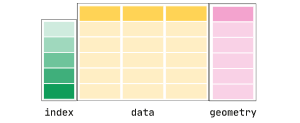

In [1]:
# !pip install geopandas

In [2]:
import geopandas as gpd

## модельные датасеты

In [3]:
# !pip3 install geodatasets

In [4]:
import geodatasets as gds

In [5]:
gdf = gpd.read_file( gds.get_path('nybb') )

In [6]:
display(gdf)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<Axes: >

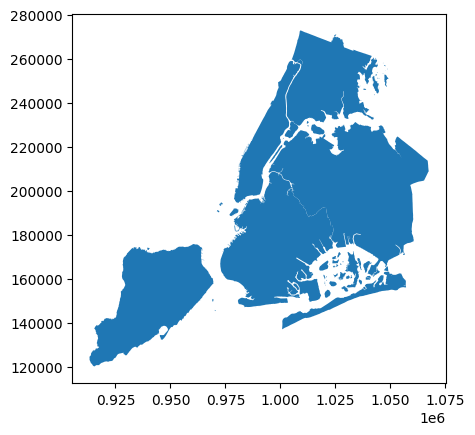

In [7]:
gdf.plot()

In [8]:
# gdf.to_file('nybb.geojson', driver="GeoJSON")

## меряем площадь областей

In [9]:
gdf = gdf.set_index("BoroName")
gdf["area"] = gdf.area
display(gdf[["area"]])

,area
BoroName,
Staten Island,1.623822e+09
Queens,3.045214e+09
Brooklyn,1.937478e+09
Manhattan,6.364712e+08
Bronx,1.186926e+09


## границы областей

,boundary
BoroName,
Staten Island,"MULTILINESTRING ((970217.022 145643.332, 97022..."
Queens,"MULTILINESTRING ((1029606.077 156073.814, 1029..."
Brooklyn,"MULTILINESTRING ((1021176.479 151374.797, 1021..."
Manhattan,"MULTILINESTRING ((981219.056 188655.316, 98094..."
Bronx,"MULTILINESTRING ((1012821.806 229228.265, 1012..."


<Axes: >

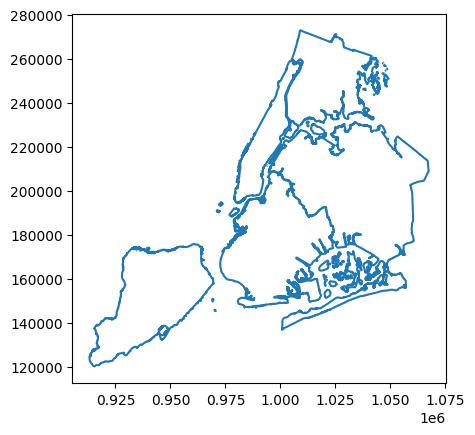

In [10]:
gdf['boundary'] = gdf.boundary
display(gdf[['boundary']])

gdf['boundary'].plot()

## центры областей

,centroid
BoroName,
Staten Island,POINT (941639.450 150931.991)
Queens,POINT (1034578.078 197116.604)
Brooklyn,POINT (998769.115 174169.761)
Manhattan,POINT (993336.965 222451.437)
Bronx,POINT (1021174.790 249937.980)


<Axes: >

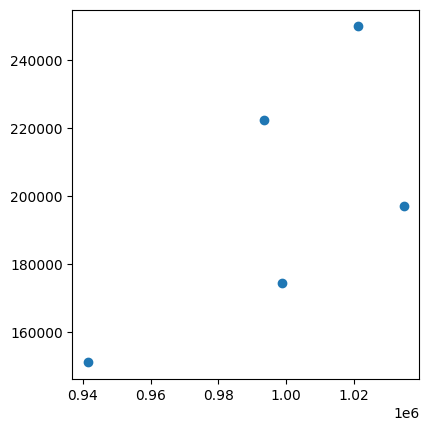

In [11]:
gdf['centroid'] = gdf.centroid
display( gdf[['centroid']] )
gdf['centroid'].plot()

## оценка расстояния

In [12]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
display( gdf[['distance']] )
display( gdf['distance'].mean() ) # среднее расстояние

,distance
BoroName,
Staten Island,0.000000
Queens,103781.535276
Brooklyn,61674.893421
Manhattan,88247.742789
Bronx,126996.283623


76140.09102166798

## рисуем карты

In [13]:
gdf.sample(3)

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid,distance
BoroName,,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),0.000000
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),61674.893421
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),103781.535276


<Axes: >

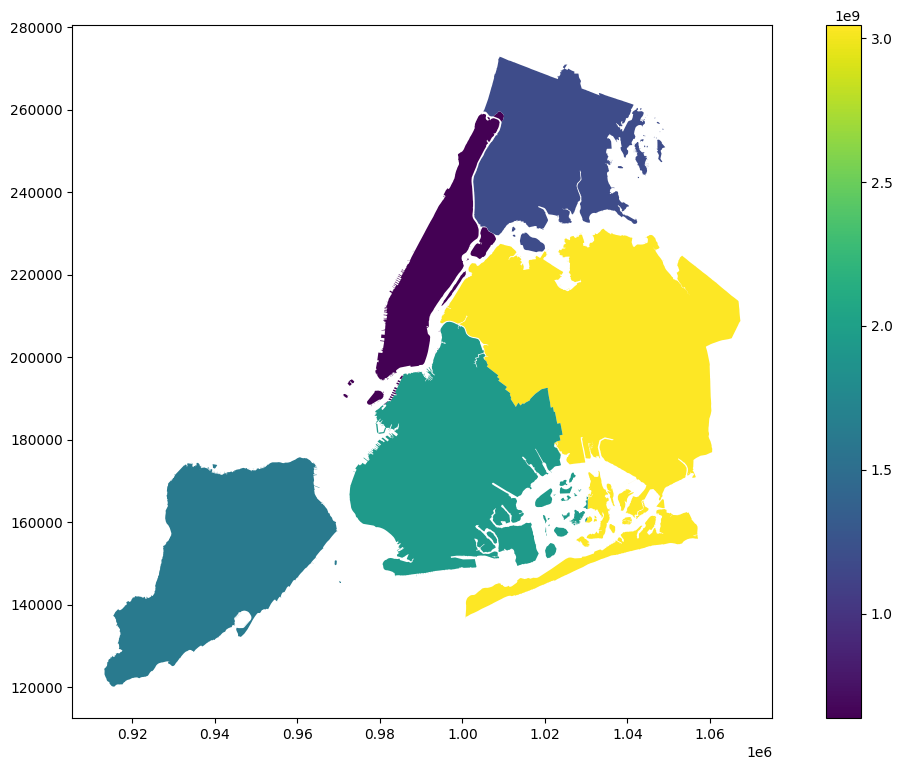

In [14]:
# визуализация оценки площади областей
gdf.plot('area', legend=True, figsize=(14,9))

In [15]:
# !pip install folium matplotlib mapclassify

In [ ]:
# визуализация оценки площади областей c наложением на карту
gdf.explore('area', legend=False)

<Axes: >

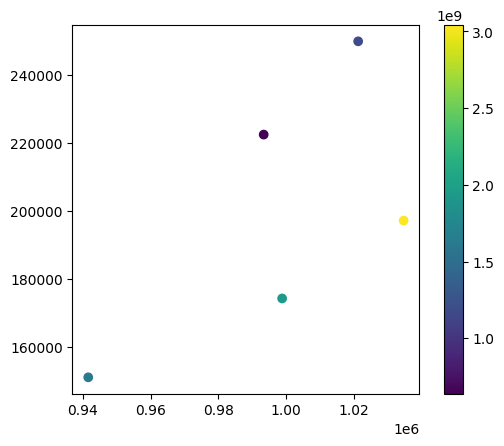

In [17]:
gdf = gdf.set_geometry("centroid") # Switching the active geometry 
gdf.plot("area", legend=True)

<Axes: >

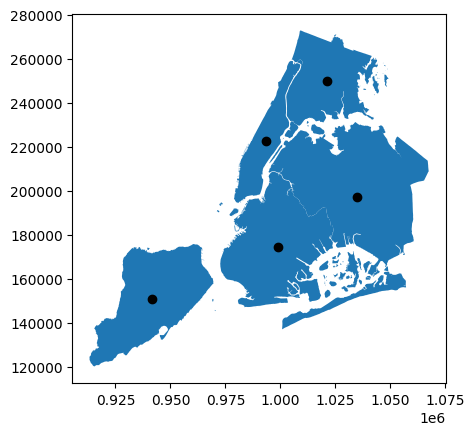

In [18]:
# рисование с наложением данных 
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

In [19]:
gdf = gdf.set_geometry("geometry") # set the active geometry back to the original 

## выпуклая оболочка

<Axes: >

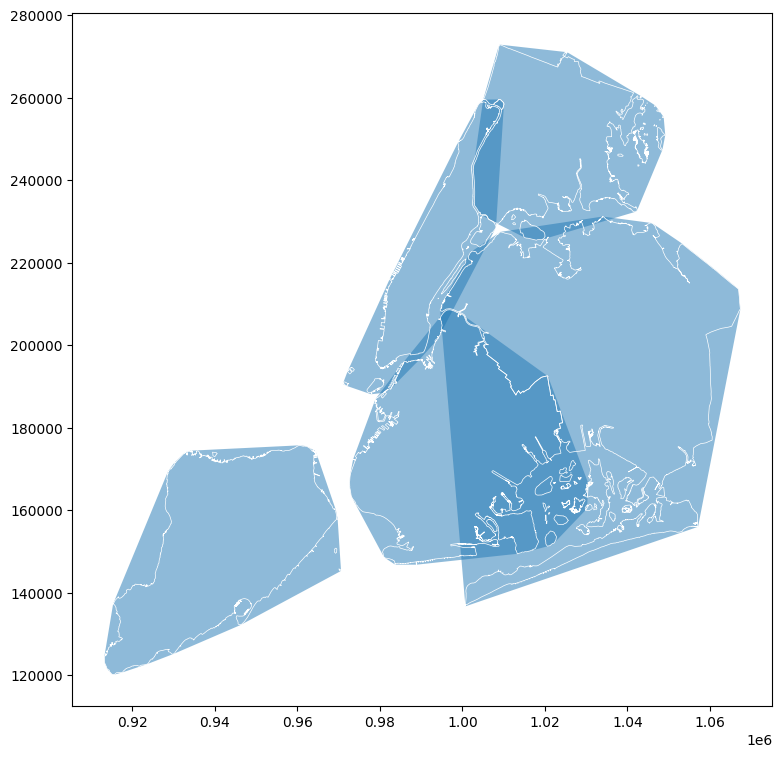

In [20]:
gdf["convex_hull"] = gdf.convex_hull
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["convex_hull"].plot(alpha=.5,figsize=(14,9))  
# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5,figsize=(14,9)) 

## увеличение областей (буферные зоны на границах)

<Axes: >

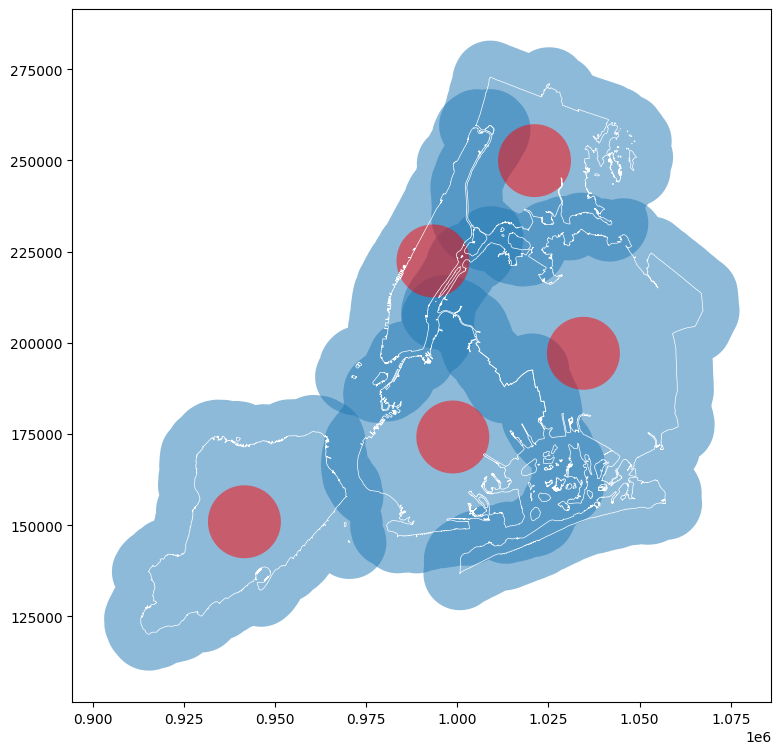

In [21]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10_000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10_000)

# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["buffered"].plot(alpha=.5,figsize=(14,9)) 

# passing the first plot as an axis to the second
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5,figsize=(14,9))  

# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5,figsize=(14,9))

## пересечение областей с учётом буферных зон

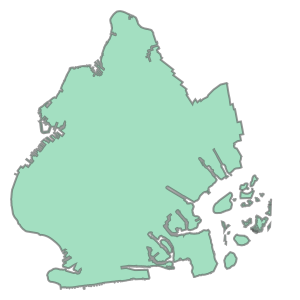

In [22]:
brooklyn = gdf.loc["Brooklyn", "geometry"]
brooklyn

In [23]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

In [24]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

## оценка попадания точки в область с учётом буферных зон

In [25]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: within, dtype: bool

<Axes: >

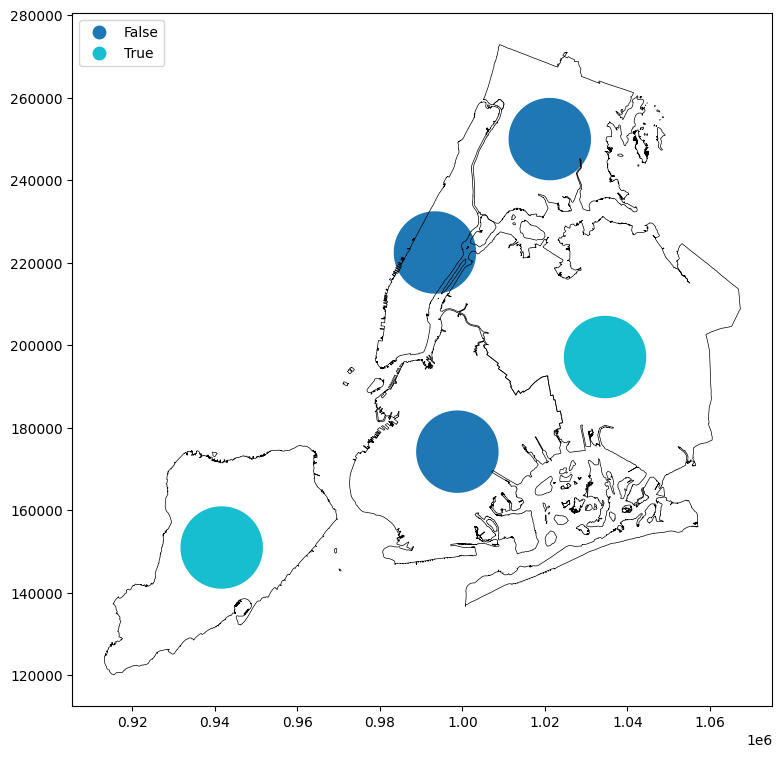

In [26]:
gdf = gdf.set_geometry("buffered_centroid")

# using categorical plot and setting the position of the legend
ax = gdf.plot("within", legend=True, categorical=True,
              legend_kwds={'loc': "upper left"},figsize=(14,9))  

# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5,figsize=(14,9)) 

## преобразования систем координат

In [27]:
gdf.crs # Coordinate Reference System (CRS)

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

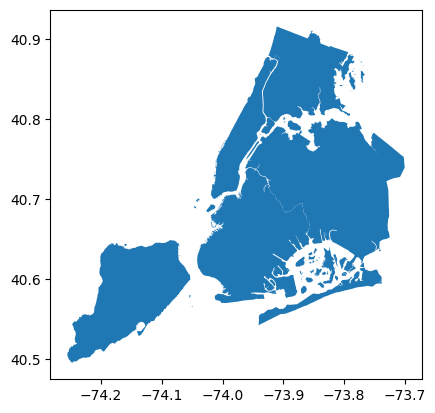

In [28]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()

In [29]:
boroughs_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

---

In [30]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.21.0

geopandas  : 0.14.3
geodatasets: 2023.12.0

